In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator

# Problem 0

Critique the most important figure from a seminal paper in your field. Provide the original figure/caption. In your own words, what story is this figure trying to convey? What does it do well? What could have been done better? What elements didn't need to be present to still convey the same story?

<img src="hw_2_data/des.png" alt="Drawing" style="width: 400px;"/>

The figure caption is as follows: MLCS SNe Ia Hubble diagram. The upper panel shows the Hubble diagram for the low-redshift and high-redshift SNe Ia samples with distances measured from the MLCS method (Riess, Press, & Kirshner 1995, 1996a; Appendix of this paper). Overplotted are three cosmologies: “low” and “high” $\Omega_M$ with $\Omega_\Lambda = 0$ and the best fit for a flat cosmology, $\Omega_M = 0.24$, $\Omega_\Lambda = 0.76$. The bottom panel shows the difference between data and models with $\Omega_M = 0.20$, $\Omega_\Lambda = 0$. The open symbol is SN 1997ck (z = 0.97) which lacks spectroscopic classification and a color measurement. The average difference between the data and the $\Omega_M = 0.20$, $\Omega_\Lambda = 0$ prediction is 0.25 mag.

The top panel of the above figure fits 3 cosmologies--two that include a cosmological constant, and one that does not, to the data of supernovae that are close to and far away from us. The below panel compares models with the supernovae data without a cosmological constant. It appears that the cosmology with a cosmological constant best fits the models. 

The figure does a good job of succintly showing the differences between two parameters; three cosmologies, on two panels. The second panel is especially powerful, showing how low-redshift and high-redshift SNe are distributed and how each cosmological model traces the data. The labels in the top panel are clear and easily marked, as are the data, error bars, and range on the bottom panel. The axes tick marks are also intelligently placed such that they accurately mirror the distribution of the data.

However, the figure does a poor job in some important respects. Firstly, the color scheme is black-and-white--I think the figure would benefit by distinctly coloring each cosmological model to further distinguish between them. In the top figure especially, it's extremely difficult to see the error bars, distinguish between the lines, and note where each data point falls--there's overlap between points and directly on top of the lines. Either making the points smaller or adjusting the range, in conjunction with coloring the various cosmologies, would help clarify the figure. 

The legend could be moved to the top left of the top panel since there's so much white space. I also think the legend could be more easily read if it included spaces between each character. Similarly, there should be a label on the bottom panel describing the cosmology chosen for the models. 

I think the bottom panel could reduce its range--I'm not sure there's a good reason why it continues beyond $-0.5$. That would help clean up the bottom panel, and make the differences between the cosmologies more easily read. 

# Problem 1

<img src="hw_2_data/myfig.pdf" alt="Drawing" style="width: 800px;"/>

In [1]:
import numpy as np
from collections import OrderedDict
from bokeh.plotting import *
from bokeh.plotting import figure, show, output_file, output_notebook
from bokeh.models import HoverTool, LabelSet
from bokeh.models import Legend

## show inline in the notebook
output_notebook()

x = [4.778768365, 4.841551579, 4.920079385, 5.002648566, 5.06262336, 5.117156847, 5.157993298, 5.2015796, 5.231762428, 5.331264739, 5.361184063]
y = [3.51474396001354, 3.513740946, 3.511097821, 3.507642535, 3.506393144, 3.505001778, 3.507207889, 3.512103329, 3.51820182, 3.535743166, 3.543102802]
labels = ['15M', '16M', '17M', '18M', '19M', '20M', '21M', '22M', '23M', '24M', '25M']

TOOLS="crosshair,pan,wheel_zoom,box_zoom,undo,redo,reset,tap,save,box_select,poly_select,lasso_select"

p = figure(plot_width=400, plot_height=400, tools = [TOOLS])

# add a circle renderer with a size, color, and alpha
p.circle(x, y, angle = labels, size=20, line_color="navy", fill_color= ["Red", "Orange", "Yellow", "Green", "Blue", "Purple", "Pink", "Black", "Gray", "Cyan", "HotPink"], 
         fill_alpha=0.3)

p.xaxis.axis_label = "logL (LSun)"
p.yaxis.axis_label = "logT (K)"
#p.add_layout(labels)

p.add_tools(HoverTool(tooltips=[
    ("logL, logT", "($x, $y)"),
    ("mass", "@angle")
]))

show(p)  # open a browser

Loading BokehJS ...

# Problem 2

In [9]:
ny_temps = pd.read_csv('hw_2_data/ny_temps.txt', sep = '\t')
ny_temps_date = np.array(ny_temps['Modified Julian Date'])
ny_temps_T = np.array(ny_temps['Max Temperature'])

yahoo = pd.read_csv('hw_2_data/yahoo_data.txt', sep = '\t')
yahoo_date = np.array(yahoo['Modified Julian Date'])
yahoo_stock = np.array(yahoo['Stock Value'])

google = pd.read_csv('hw_2_data/google_data.txt', sep = '\t')
google_date = np.array(google['Modified Julian Date'])
google_stock = np.array(google['Stock Value'])

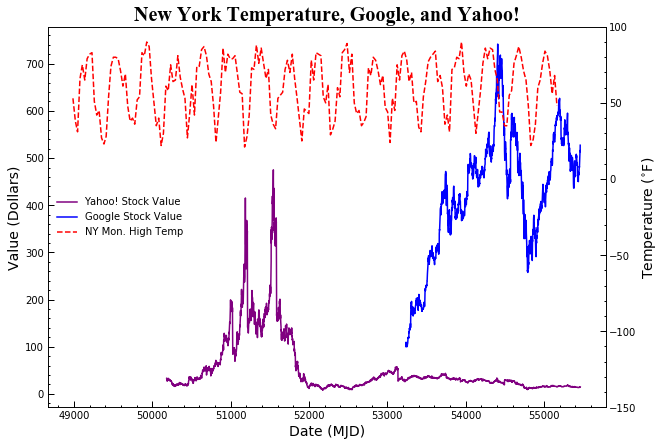

In [68]:
tnrfont = {'fontname':'Times New Roman'}
ml = MultipleLocator(5)

fig, ax1 = plt.subplots(figsize = (10,7))

yahoo, = ax1.plot(yahoo_date, yahoo_stock, color = 'purple', label = 'Yahoo! Stock Value')
google, = ax1.plot(google_date, google_stock, color = 'blue', label = 'Google Stock Value')
ax1.set_xticks(np.linspace(48800, 55600, 35), minor=True)
ax1.set_yticks(np.linspace(-20, 760, 40), minor=True)
ax1.get_xaxis().set_tick_params(which = 'minor', direction='in', width = 1, length = 2)
ax1.get_yaxis().set_tick_params(which = 'minor', direction='in', width = 1, length = 2)
ax1.get_xaxis().set_tick_params(which = 'major', direction='in', width = 1, length = 6)
ax1.get_yaxis().set_tick_params(which = 'major', direction='in', width = 1, length = 6)
ax1.set_xlabel('Date (MJD)', fontsize = 14)
ax1.set_ylabel('Value (Dollars)', fontsize = 14)

ax2 = ax1.twinx()
ny, = ax2.plot(ny_temps_date, ny_temps_T, color = 'red', linestyle = '--', label = 'NY Mon. High Temp')
ax2.set_ylim(-150,100)
ax2.set_yticks(np.linspace(-150, 100, 26), minor=True)
ax2.get_yaxis().set_tick_params(which = 'minor', direction='in', width = 1, length = 2)
ax2.get_yaxis().set_tick_params(which = 'major', direction='in', width = 1, length = 6)
ax2.set_ylabel('Temperature ($^{\circ}$F)', fontsize = 14)

plt.legend(handles=[yahoo, google, ny], loc="center left", frameon=False)

plt.title('New York Temperature, Google, and Yahoo!',**tnrfont, fontsize = 20)
plt.show()